# Step-1: Import the Necessary Dependencies

In [1]:
# utilities
import re
import numpy as np
import pandas as pd

In [2]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# nltk
from nltk.stem import WordNetLemmatizer

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Step-2: Read and Load the Dataset

1. target: the polarity of the tweet (positive or negative) 
2. ids: Unique id of the tweet
3. date: the date of the tweet
4. flag: It refers to the query. If no such query exists, then it is NO QUERY.
5. user: It refers to the name of the user that tweeted
6. text: It refers to the text of the tweet

In [5]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
470889,0,2176515375,Mon Jun 15 04:04:47 PDT 2009,NO_QUERY,Ram0ng,Back home after my test for maths; made absolu...
1147184,4,1978039223,Sat May 30 22:17:21 PDT 2009,NO_QUERY,SweetPseudonym,hey! I booked my return flight! Its gunna be W...
518427,0,2191541331,Tue Jun 16 05:29:28 PDT 2009,NO_QUERY,veritanuda,@Veronica Hope that does not mean you are goi...
1593680,4,2191984743,Tue Jun 16 06:18:49 PDT 2009,NO_QUERY,marusoze,there is so much on the internet that is stupi...
511466,0,2189906119,Tue Jun 16 01:13:29 PDT 2009,NO_QUERY,wow_wee,hate work placement...my feet back and hands h...


# Step-3: Exploratory Data Analysis

## 3.1: Five top records of data

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 3.2: Columns/features in data

In [7]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

## 3.3: Length of the dataset

In [8]:
print("Length of The Data is = ", len(df))

Length of The Data is =  1600000


## 3.4: Shape of data

In [9]:
df.shape

(1600000, 6)

## 3.5: Data information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## 3.6: Datatypes of all columns

In [11]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

## 3.7: Checking for null values

In [12]:
np.sum(df.isnull().any(axis=1))

0

## 3.8: Rows and columns in the dataset

In [13]:
print("Count of Columns in the Data is = ", len(df.columns))
print("Count of Rows in the Data is = ", len(df))

Count of Columns in the Data is =  6
Count of Rows in the Data is =  1600000


## 3.9: Check unique target values

In [14]:
df['target'].unique()

array([0, 4], dtype=int64)

## 3.10: Check the number of target values

In [15]:
df['target'].nunique()

2

# Step-4: Data Visualization of Target Variables

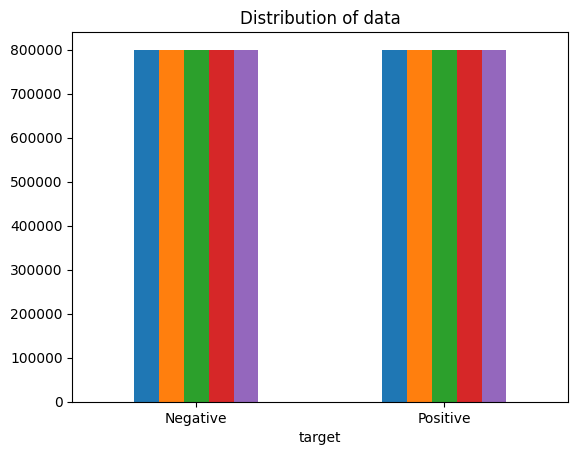

In [16]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

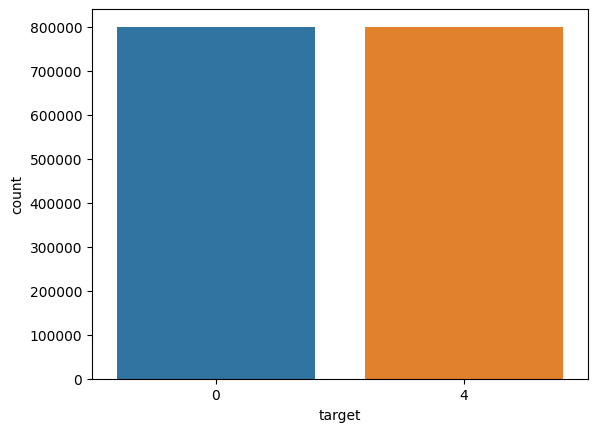

In [17]:
import seaborn as sns
sns.countplot(x='target', data=df)

# Step-5: Data Preprocessing


In the above-given problem statement, before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed, thereby reducing the unnecessary noise from the dataset. After that, we also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form, known as lemma) for better results.

## 5.1: Selecting the text and Target column for our further analysis

In [18]:
data=df[['text','target']]

## 5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

In [19]:
# data['target'] = data['target'].replace(4,1)
data.loc[data['target'] == 4, 'target'] = 1


## 5.3: Printing unique values of target variables

In [20]:
data['target'].unique()

array([0, 1], dtype=int64)

## 5.4: Separating positive and negative tweets

In [21]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

## 5.5: Taking one-fourth of the data so we can run it on our machine easily

In [22]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

## 5.6: Combining positive and negative tweets

In [23]:
dataset = pd.concat([data_pos, data_neg])

## 5.7: Making statement text in lowercase

In [24]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

## 5.8: Defining set containing all stopwords in English.

In [25]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

## 5.9: Cleaning and removing the above stop words list from the tweet text

In [26]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

## 5.10: Cleaning and removing punctuations

In [27]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

## 5.11: Cleaning and removing repeating characters

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

## 5.12: Cleaning and removing URLs

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

## 5.13: Cleaning and removing numeric numbers

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

## 5.14: Getting tokenization of tweet text

In [31]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].astype(str)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

## 5.15: Applying stemming

In [32]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

## 5.16: Applying lemmatizer

In [33]:
# import nltk
# nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

## 5.17: Separating input feature and label

In [34]:
X=data.text
y=data.target

## 5.18: Plot a cloud of words for negative tweets

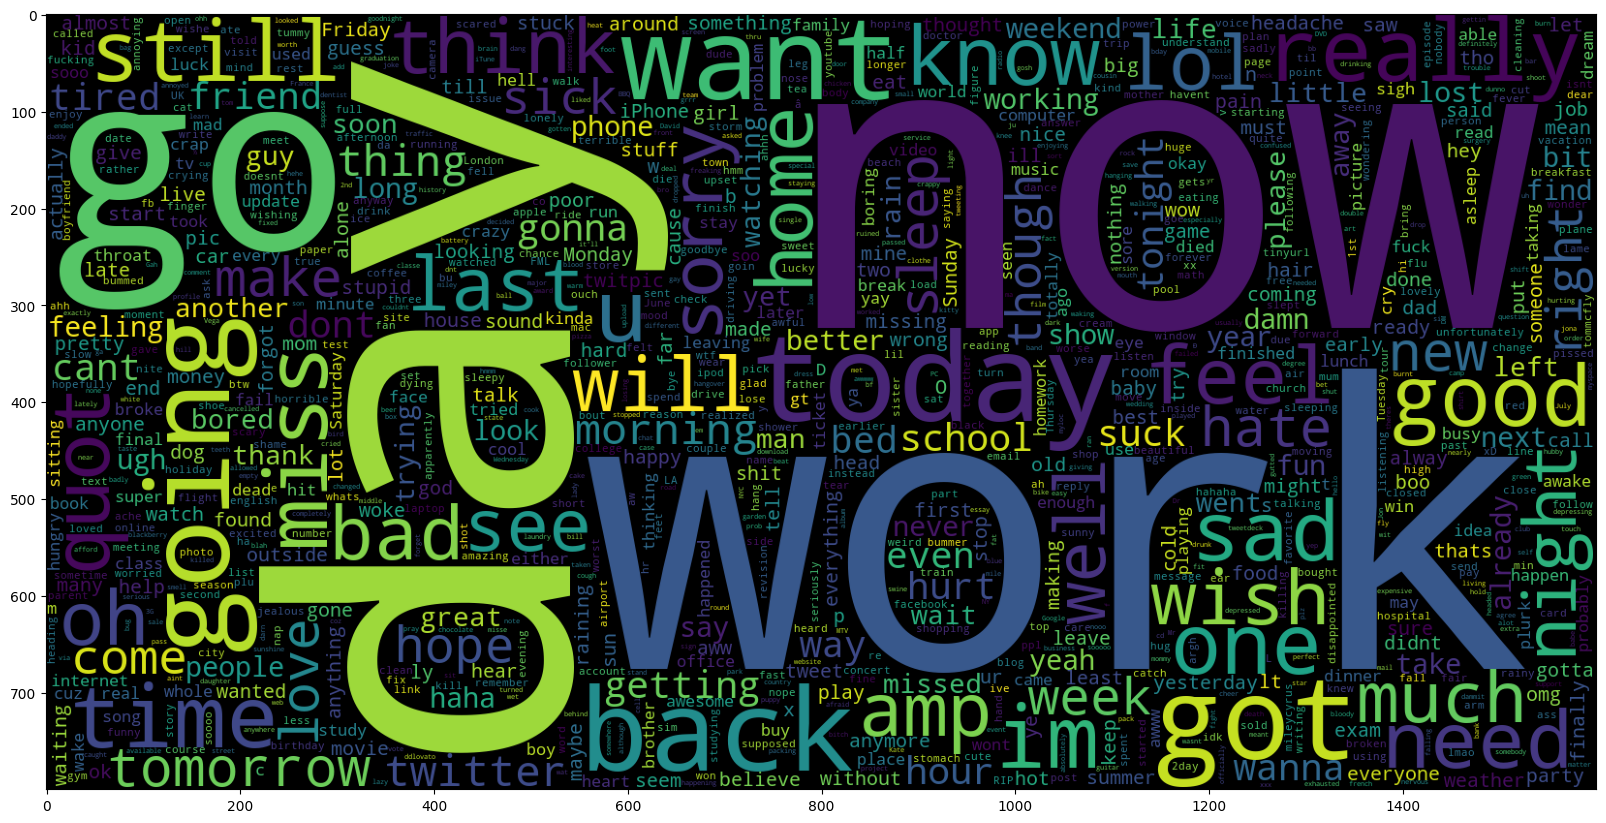

In [35]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## 5.19: Plot a cloud of words for positive tweets

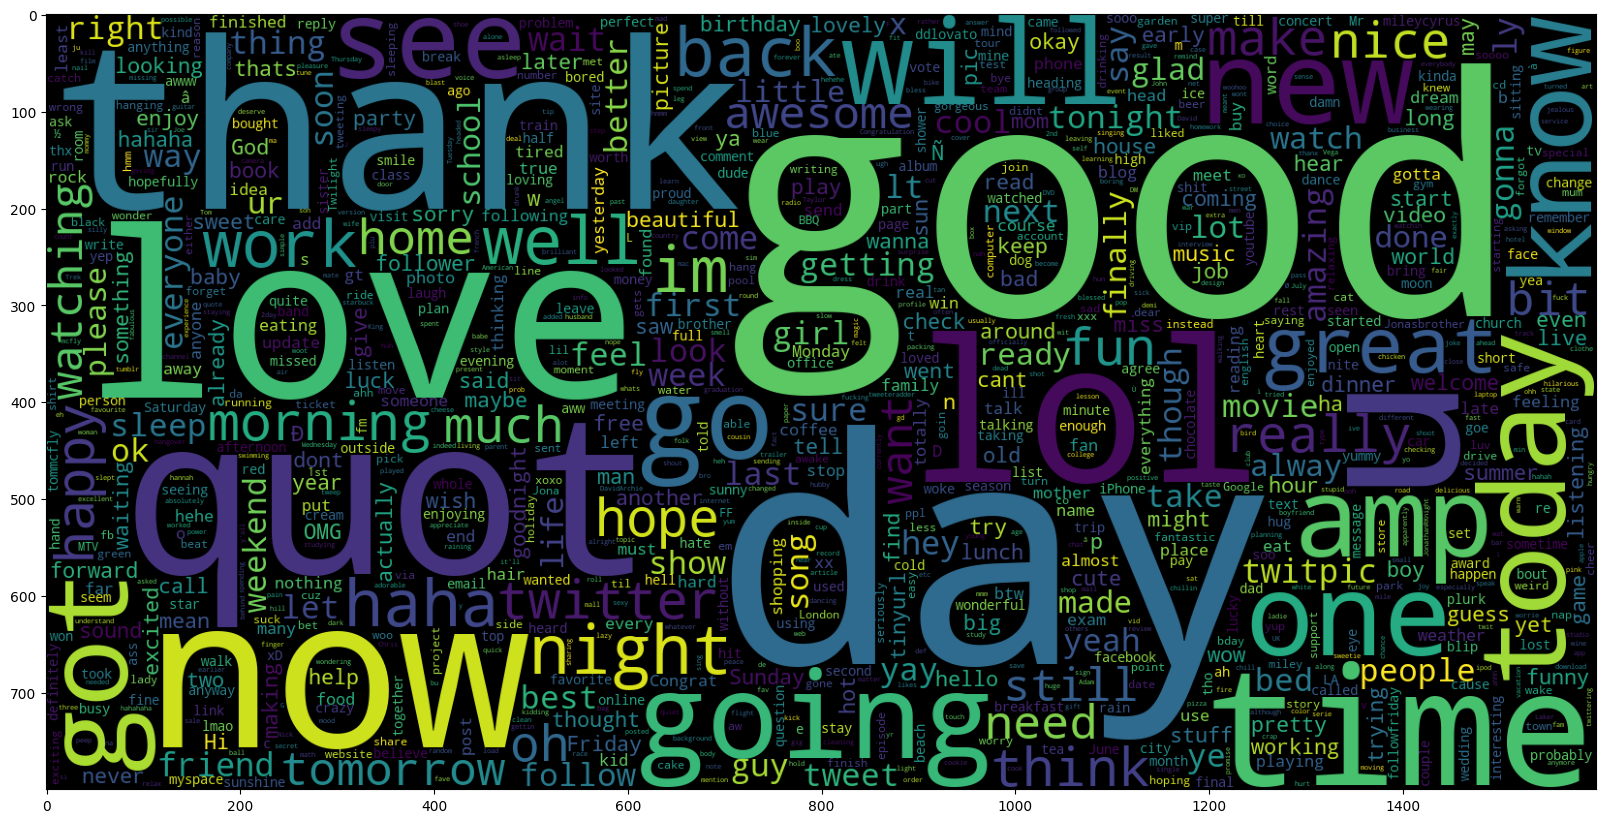

In [36]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# Step-6: Splitting Our Data Into Train and Test Subsets

In [37]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# Step-7: Transforming the Dataset Using TF-IDF Vectorizer

## 7.1: Fit the TF-IDF Vectorizer

In [38]:
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
# vectoriser.fit(X_train)
# print('No. of feature_words: ', len(vectoriser.get_feature_names))

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
X_train_transformed = vectorizer.fit_transform(X_train)
feature_names = list(vectorizer.vocabulary_.keys())
print('No. of feature_words:', len(feature_names))



No. of feature_words: 500000


## 7.2: Transform the data using TF-IDF Vectorizer

In [39]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

# Step-8: Function for Model Evaluation

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

1. Accuracy Score
2. Confusion Matrix with Plot
3. ROC-AUC Curve

In [40]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In the problem statement, we have used three different models respectively :

1. Bernoulli Naive Bayes Classifier
2. SVM (Support Vector Machine)
3. Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

## 8.1: Model-1

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



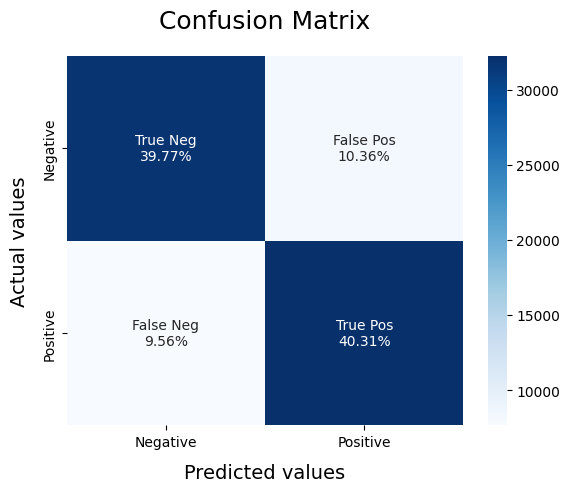

In [41]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

## 8.2: Plot the ROC-AUC Curve for model-1

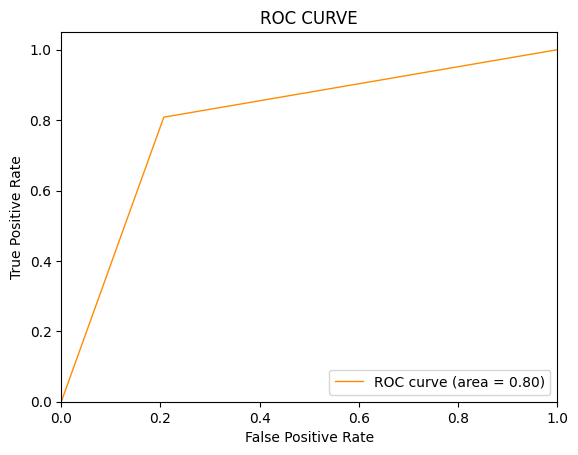

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.3: Model-2:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



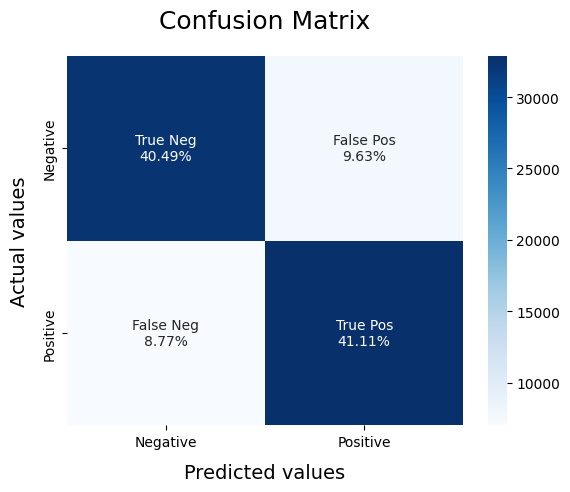

In [43]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

## 8.4: Plot the ROC-AUC Curve for model-2

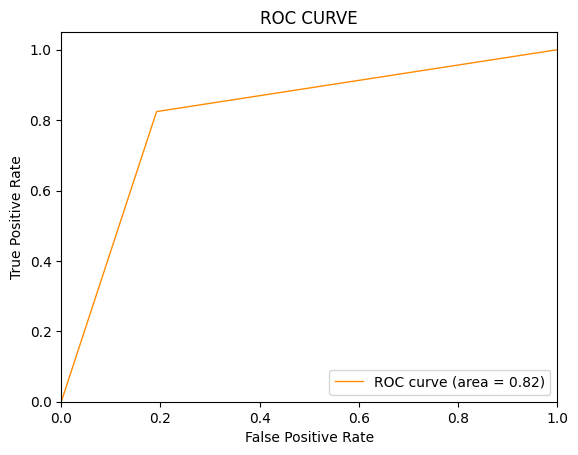

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.5: Model-3

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



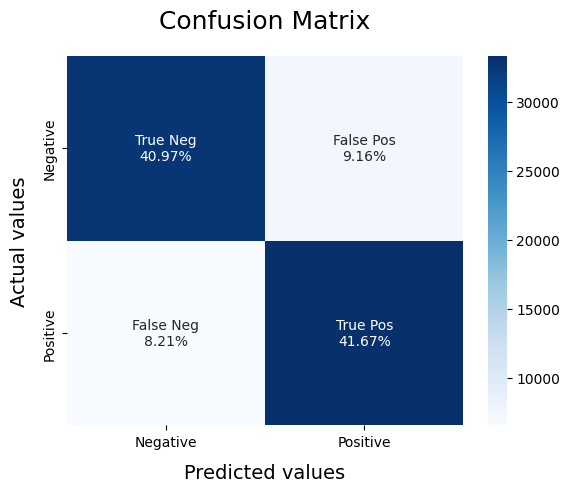

In [45]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

## 8.6: Plot the ROC-AUC Curve for model-3

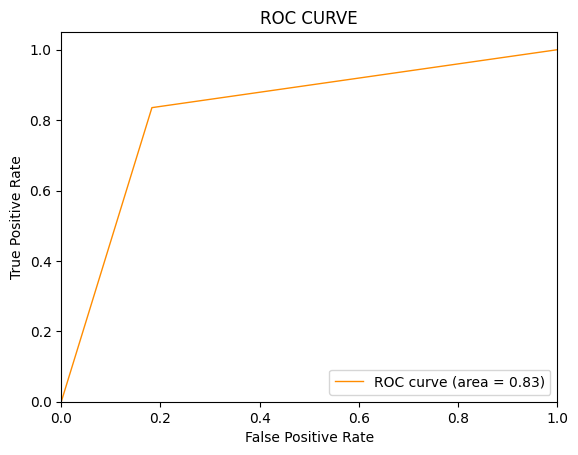

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Step-9: Model Building

# Step-10: Model Evaluation

Upon evaluating all the models, we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
1. For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
2. For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that for a particular problem statement, if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model. Therefore, the concept holds true for the above-mentioned dataset.